# The EEG Brainwave Dataset contains electronic brainwave signals from an EEG headset and is in temporal format.

The challenge is: Can we predict emotional sentiment from brainwave readings?

Import Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import os

In [3]:
brainwave_df = pd.read_csv('/content/drive/MyDrive/emotions.csv')

In [4]:
brainwave_df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
brainwave_df.tail()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2127,32.400,32.2,32.2,30.80,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,NEGATIVE
2131,27.000,32.0,31.8,25.00,28.9,4.99,1.95,6.210,3.490,-3.51,...,1.95,1.810,1.810,1.95,110.0,-6.71,22.8,22.8,-6.71,NEUTRAL


In [6]:
brainwave_df.shape

(2132, 2549)

In [7]:
brainwave_df.dtypes

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
label          object
Length: 2549, dtype: object

In [ ]:
#Descriptive Statistics

In [8]:
brainwave_df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


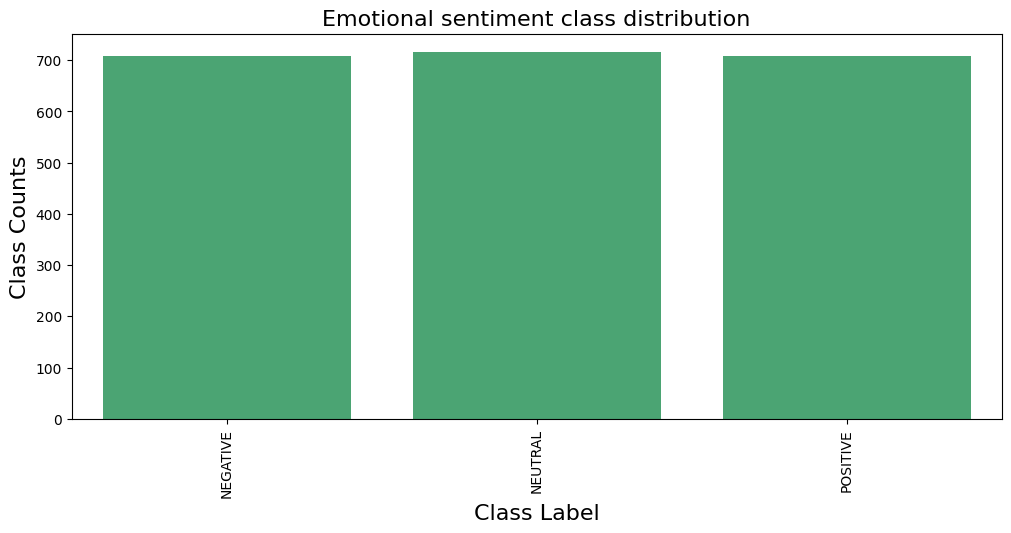

In [9]:
# class distribution
plt.figure(figsize=(12,5))
sns.countplot(x=brainwave_df.label, color='mediumseagreen')
plt.title('Emotional sentiment class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

# Correlation Between Attributes
Correlation refers to the relationship between two variables and how they may or may not change together.
The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all.

In [10]:
label_df = brainwave_df['label']
brainwave_df.drop('label', axis = 1, inplace=True)

In [11]:
correlations = brainwave_df.corr(method='pearson')
correlations

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
# mean_0_a,1.000000,0.176578,0.429810,0.582697,0.178432,-0.000665,0.105961,-0.061046,0.135370,0.008472,...,0.301672,-0.245671,0.204764,0.204764,-0.245671,0.268983,-0.220566,0.196653,0.196653,-0.220566
mean_1_a,0.176578,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197,...,0.130717,-0.047208,0.002549,0.002549,-0.047208,0.153244,-0.096173,0.069532,0.069532,-0.096173
mean_2_a,0.429810,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564,...,0.699461,-0.742275,0.622567,0.622567,-0.742275,0.674195,-0.728296,0.565044,0.565044,-0.728296
mean_3_a,0.582697,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110,...,0.133720,-0.067460,0.048202,0.048202,-0.067460,0.103294,-0.061376,0.051216,0.051216,-0.061376
mean_4_a,0.178432,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361,...,-0.043602,0.069458,-0.090163,-0.090163,0.069458,-0.039620,0.056452,-0.016933,-0.016933,0.056452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fft_745_b,0.268983,0.153244,0.674195,0.103294,-0.039620,0.024944,-0.043387,0.098389,-0.022019,-0.003329,...,0.458558,-0.431711,0.415781,0.415781,-0.431711,1.000000,-0.938696,0.834622,0.834622,-0.938696
fft_746_b,-0.220566,-0.096173,-0.728296,-0.061376,0.056452,0.002976,-0.001477,-0.061713,0.005671,-0.005395,...,-0.493145,0.531019,-0.459876,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000
fft_747_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_748_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108


In [12]:
#Skew of Univariate Distributions
skew = brainwave_df.skew()
skew

# mean_0_a    3.839961
mean_1_a     -5.400903
mean_2_a     -1.769376
mean_3_a      0.293842
mean_4_a     -3.911369
                ...   
fft_745_b    -1.328085
fft_746_b     1.443938
fft_747_b     1.221094
fft_748_b     1.221094
fft_749_b     1.443938
Length: 2548, dtype: float64

In [13]:
y=label_df
X=brainwave_df

In [14]:
y.shape

(2132,)

In [15]:
y

0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
2127     NEUTRAL
2128    POSITIVE
2129    NEGATIVE
2130    NEGATIVE
2131     NEUTRAL
Name: label, Length: 2132, dtype: object

In [16]:
X.shape

(2132, 2548)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

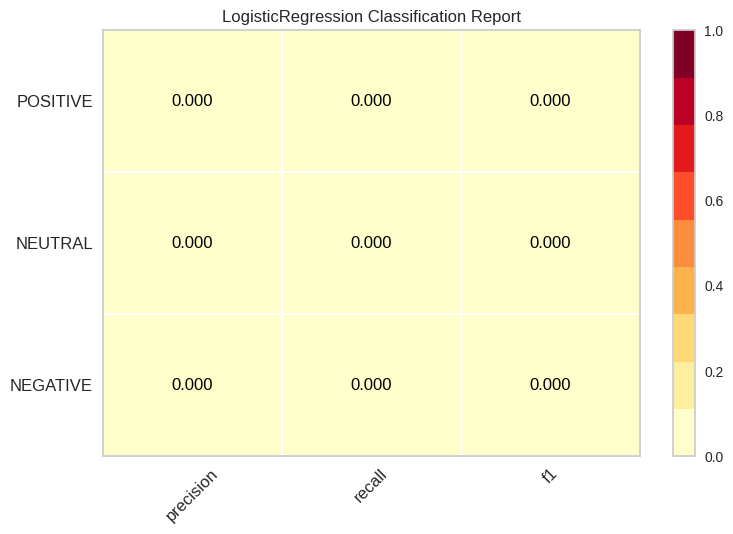

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [18]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

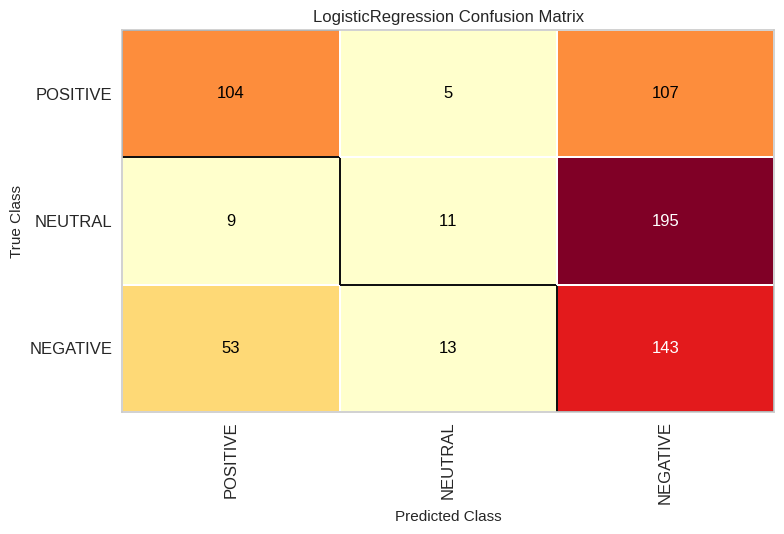

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
classes=["POSITIVE","NEUTRAL","NEGATIVE"]
model = LogisticRegression(multi_class="auto", solver="liblinear")

iris_cm = ConfusionMatrix(
    model, classes=classes,
    label_encoder={0: 'setosa', 1: 'versicolor'}
)

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.poof()

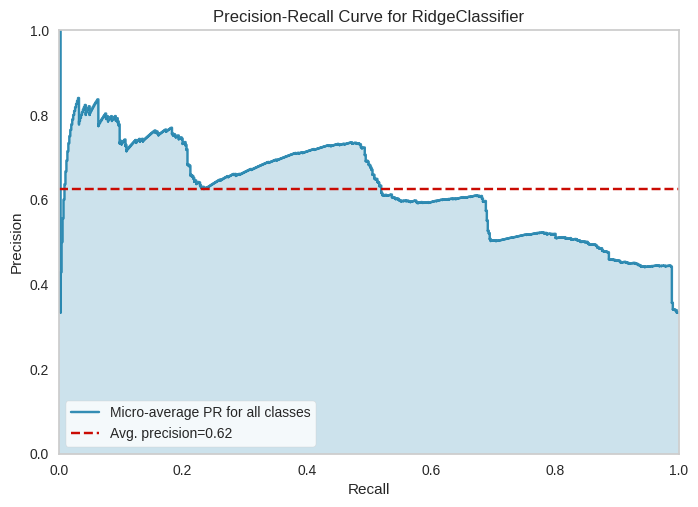

<Axes: title={'center': 'Precision-Recall Curve for RidgeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [20]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(RidgeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

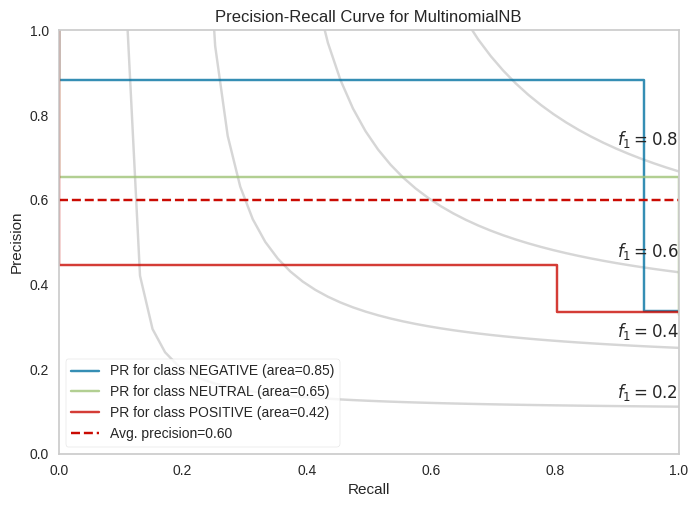

<Axes: title={'center': 'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

# Load dataset and encode categorical variables
X = OrdinalEncoder().fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(
    MultinomialNB(), per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False, classes=encoder.classes_
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

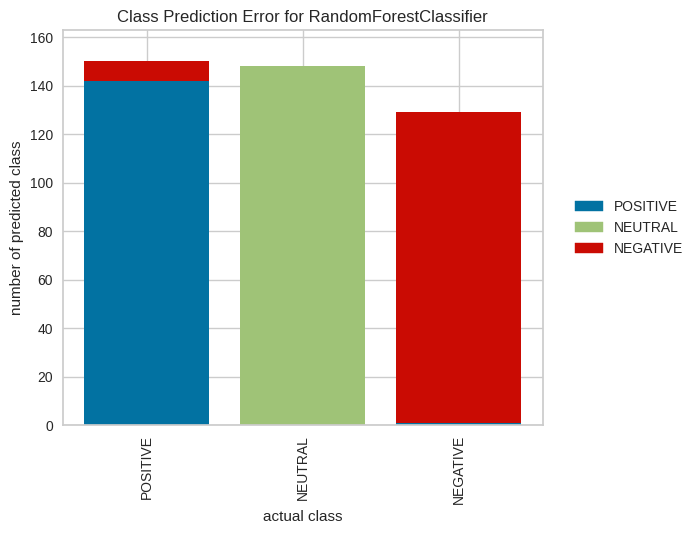

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

classes=["POSITIVE","NEUTRAL","NEGATIVE"]

# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()

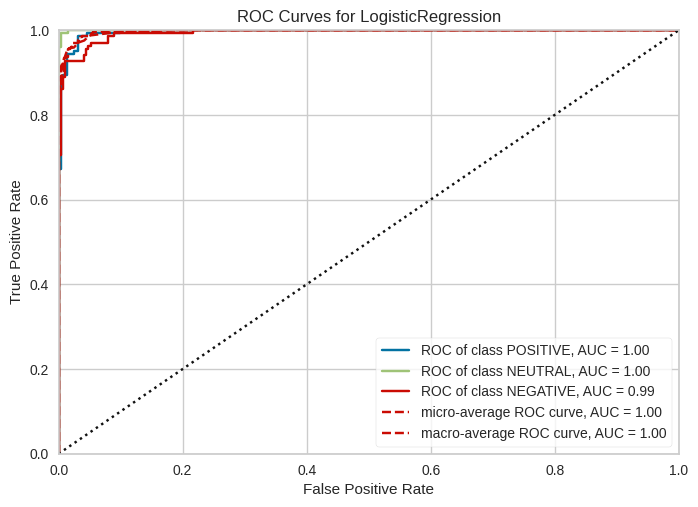

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["POSITIVE","NEUTRAL","NEGATIVE"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()   

# RandomForest Classifier
RandomForest is a tree & bagging approach-based ensemble classifier. It will automatically reduce the number of features by its probabilistic entropy calculation approach.

In [24]:
%%time

pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for RandomForest : ', scores.mean())

Accuracy for RandomForest :  0.9864025273134132
CPU times: user 56.8 s, sys: 151 ms, total: 56.9 s
Wall time: 57.1 s


# Logistic Regression Classifier
Logistic Regression is a linear classifier and works in same way as linear regression.

In [25]:
%%time

pl_log_reg = Pipeline(steps=[('scaler',StandardScaler()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression: ', scores.mean())

Accuracy for Logistic Regression:  0.9324667631959983
CPU times: user 4min 25s, sys: 1.31 s, total: 4min 27s
Wall time: 4min 36s


# Principal Component Analysis (PCA)
PCA can transform original low level variables to a higher dimensional space and thus reduce the number of required variables. All co-linear variables get clubbed together.

In [26]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(brainwave_df)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.3677256411753875
Explained Variance ratio by Principal Component  2  :  0.09553894257232615
Explained Variance ratio by Principal Component  3  :  0.08436069000482485
Explained Variance ratio by Principal Component  4  :  0.06085665181970171
Explained Variance ratio by Principal Component  5  :  0.047453732926251505
Explained Variance ratio by Principal Component  6  :  0.03082305251847158
Explained Variance ratio by Principal Component  7  :  0.024721620860921358
Explained Variance ratio by Principal Component  8  :  0.013753055070745248
Explained Variance ratio by Principal Component  9  :  0.012408702721146699
Explained Variance ratio by Principal Component  10  :  0.012103653572039418
Explained Variance ratio by Principal Component  11  :  0.009557100574914606
Explained Variance ratio by Principal Component  12  :  0.009164311018300276
Explained Variance ratio by Principal Component  13  :  0.008740057316347319
Explained Vari

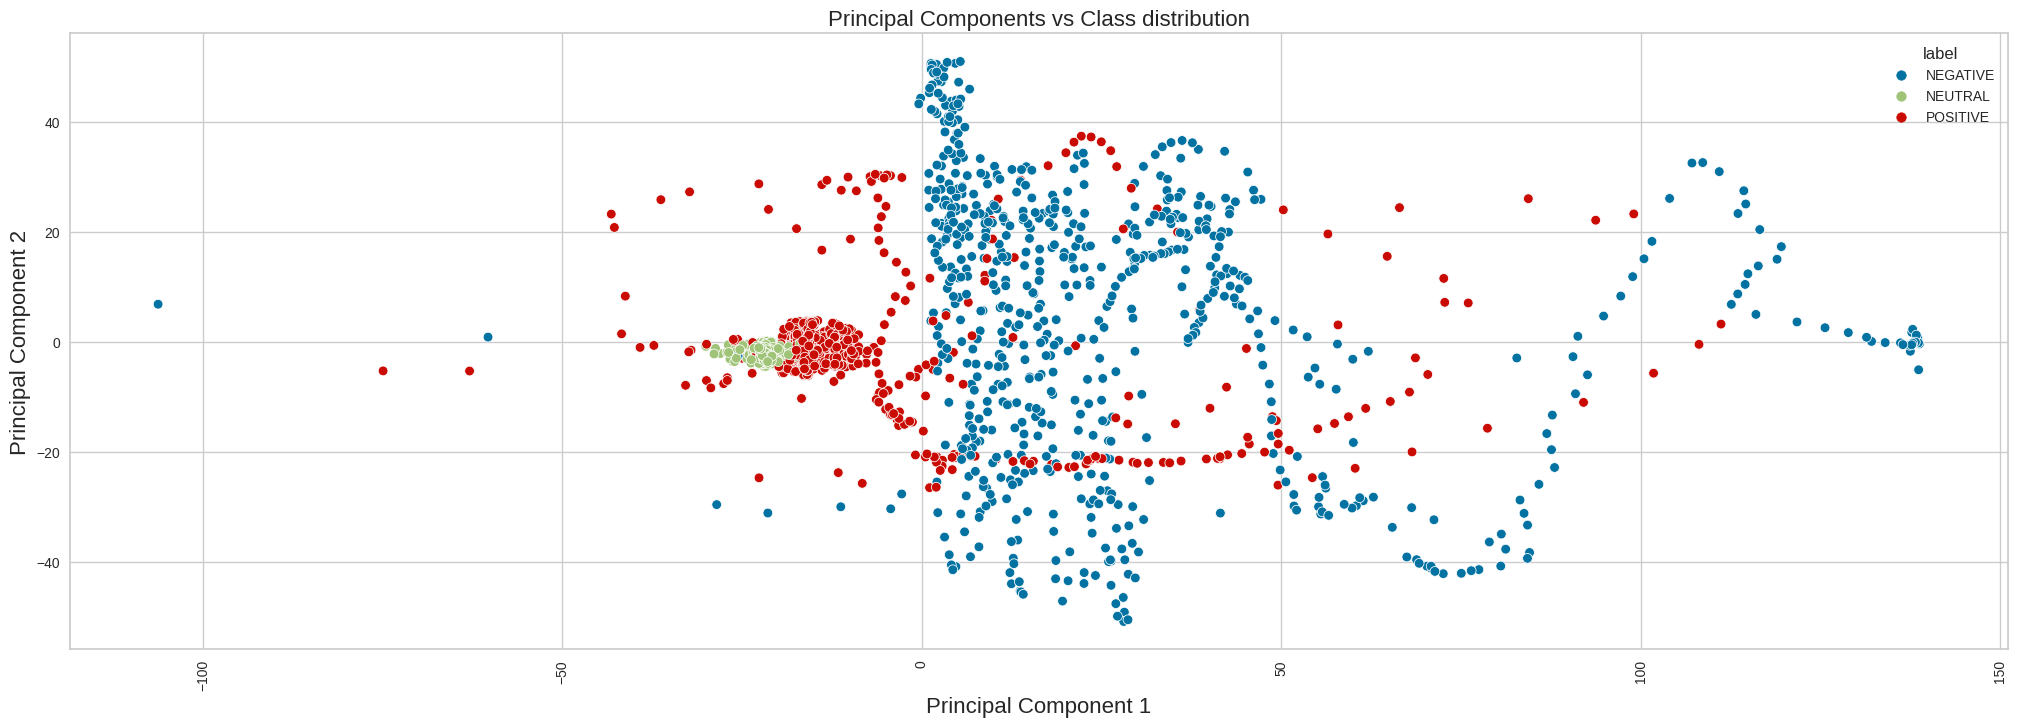

In [27]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In [ ]:
#Logistic Regression classifier with these two PCs

In [28]:
%%time
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 2)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.7753213987977711
CPU times: user 8.89 s, sys: 6.34 s, total: 15.2 s
Wall time: 8.99 s


In [29]:
#Take all 10 PCs
%%time

pl_log_reg_pca_10 = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 10)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca_10, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 10 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 10 Principal Components:  0.8663156509148349
CPU times: user 10.5 s, sys: 6.49 s, total: 17 s
Wall time: 11.6 s


# Artificial Neural Network Classifier (ANN)
An ANN classifier is non-linear with automatic feature engineering and dimensional reduction techniques. MLPClassifier in scikit-learn works as an ANN. But here also, basic scaling is required for the data.

In [30]:
%%time

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores = cross_val_score(pl_mlp, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for ANN : ', scores.mean())

Accuracy for ANN :  0.9746829888991269
CPU times: user 14min 9s, sys: 4min 2s, total: 18min 11s
Wall time: 10min 59s


In [31]:
#Linear Support Vector Machines Classifier (SVM)
%%time

pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pl_svm', LinearSVC())])
scores = cross_val_score(pl_svm, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Linear SVM : ', scores.mean())

Accuracy for Linear SVM :  0.9657693826510465
CPU times: user 1min 46s, sys: 2.42 s, total: 1min 49s
Wall time: 1min 49s


# Extreme Gradient Boosting Classifier (XGBoost)
XGBoost is a boosted tree based ensemble classifier. Like ‘RandomForest’, it will also automatically reduce the feature set.

In [33]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit the encoder to the labels and transform them to integer codes
y = le.fit_transform(y)

# now y contains integer codes for the labels
# you can check the unique values using the `unique` method
print(np.unique(y))


[0 1 2]


In [35]:
from sklearn.preprocessing import LabelEncoder

# create LabelEncoder object
le = LabelEncoder()

# fit and transform the target variable
label_df_encoded = le.fit_transform(label_df)


In [40]:
import numpy as np

# print the unique values in the target variable
print(np.unique(label_df_encoded))


[0 1 2]


In [38]:
%%time
pl_xgb = Pipeline(steps=
                  [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])


CPU times: user 57 µs, sys: 11 µs, total: 68 µs
Wall time: 72.7 µs


In [42]:
scores = cross_val_score(pl_xgb, brainwave_df, label_df_encoded, cv=10)
print('Accuracy for XGBoost Classifier : ', scores.mean())

Accuracy for XGBoost Classifier :  0.9939032951603701
